In [5]:
import os
from tensorboard.backend.event_processing import event_accumulator
import matplotlib.pyplot as plt
import numpy as np


In [6]:
main_folder = "./../../../runs/transfer42_all_tensorboard"
os.listdir(main_folder)

['200_only_real',
 '33_model_architektur_syn_real',
 'large_sigma_training_only_real',
 'large_sigma_training_synthetisch_gaus',
 'part1_only_real',
 'part1_synthetisch_gaus_real',
 'redme.txt',
 'training_channel_100_no_norm_only_real']

In [7]:
# Pfad zum Hauptordner, der alle Konfigurationsordner enthält
#main_folder = "./../../../runs/transfer37/n2info"

# Dictionary zum Speichern der Daten für jede Konfiguration
loss_train_dict = {}
estimated_sigma_dict = {}




# Durchlaufe alle Unterordner im Hauptordner
for config in os.listdir(main_folder):
    config_path = os.path.join(main_folder, config, "tensorboard")
    if os.path.isdir(config_path):
        # Suche die TensorBoard-Datei (event file) im Ordner
        for file in os.listdir(config_path):
            if file.startswith("events.out.tfevents"):
                event_file = os.path.join(config_path, file)
                
                # Initialisiere den Event-Accumulator und lade die Daten
                ea = event_accumulator.EventAccumulator(event_file)
                ea.Reload()  # Daten laden
                print(ea.Tags()["scalars"])
                
                # Extrahiere die PSNR-Scalars
                #if 'Train PSNR [0,1] avg' in ea.Tags()["scalars"]:
                try:
                    loss_values = ea.Scalars('Loss Train')
                    
                    # Speichere die Werte und Steps in einem Dictionary
                    loss_train_dict[config] = {
                        "steps": [x.step for x in loss_values],
                        "values": [x.value for x in loss_values]
                    }
                except:
                    pass
                try:
                    sigma_values = ea.Scalars('Train sigma')
                    
                    # Speichere die Werte und Steps in einem Dictionary
                    estimated_sigma_dict[config] = {
                        "steps": [x.step for x in sigma_values],
                        "values": [x.value for x in sigma_values]
                    }
                except:
                    pass


                break  # Wir gehen davon aus, dass es nur eine Event-Datei pro Konfiguration gibt

# Matplotlib-Plot für jede Konfiguration erstellen
"""
plt.figure(figsize=(10, 6))
for config, data in loss_train_dict.items():
    plt.plot(data["steps"], data["values"], label=config)

plt.xlabel("Steps")
plt.ylabel("PSNR (Train)")
plt.title("PSNR-Verlauf für verschiedene Konfigurationen")
plt.legend()
plt.show()
"""

['Train true sigma', 'Train sigma', 'Train tv', 'Loss Train', 'PSNR Train', 'Scaled Variance Train', 'LSD Train', 'Korelation Train', 'cc-Gain Train', 'Validation true sigma', 'Validation sigma', 'Validation tv', 'Loss Val', 'PSNR Val', 'Scaled Variance Val', 'LSD Val', 'Korelation Val', 'cc-Gain Val', 'Image PSNR of SNR=original', 'Image Scaled Variance of SNR=original', 'Image LSD of SNR=original', 'Image Korrelation of SNR=original', 'Lernrate', 'Sigma test', 'Test ture sigma', 'Test sigma', 'Test tv', 'Loss Test', 'PSNR Test', 'Scaled Variance Test', 'LSD Test', 'Korelation Test', 'cc-Gain Test']
['Sigma train', 'Train true sigma', 'Train sigma', 'Train tv', 'Loss Train', 'PSNR Train', 'Scaled Variance Train', 'LSD Train', 'Korelation Train', 'cc-Gain Train', 'Sigma val', 'Validation true sigma', 'Validation sigma', 'Validation tv', 'Loss Val', 'PSNR Val', 'Scaled Variance Val', 'LSD Val', 'Korelation Val', 'cc-Gain Val', 'Image PSNR of SNR=0.1', 'Image Scaled Variance of SNR=0.1',

'\nplt.figure(figsize=(10, 6))\nfor config, data in loss_train_dict.items():\n    plt.plot(data["steps"], data["values"], label=config)\n\nplt.xlabel("Steps")\nplt.ylabel("PSNR (Train)")\nplt.title("PSNR-Verlauf für verschiedene Konfigurationen")\nplt.legend()\nplt.show()\n'

In [27]:
loss_train_dict['training_channel_100_no_norm_only_real']['values']
['steps']
for i, (config, data) in  enumerate(loss_train_dict.items()):

    #print(min(data["values"]))
    print(config)

200_only_real
33_model_architektur_syn_real
large_sigma_training_only_real
large_sigma_training_synthetisch_gaus
part1_only_real
part1_synthetisch_gaus_real
training_channel_100_no_norm_only_real


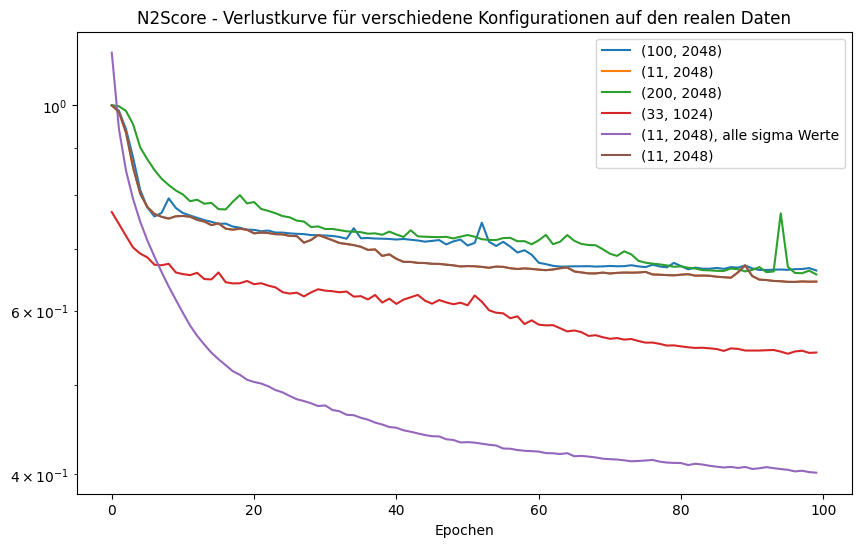

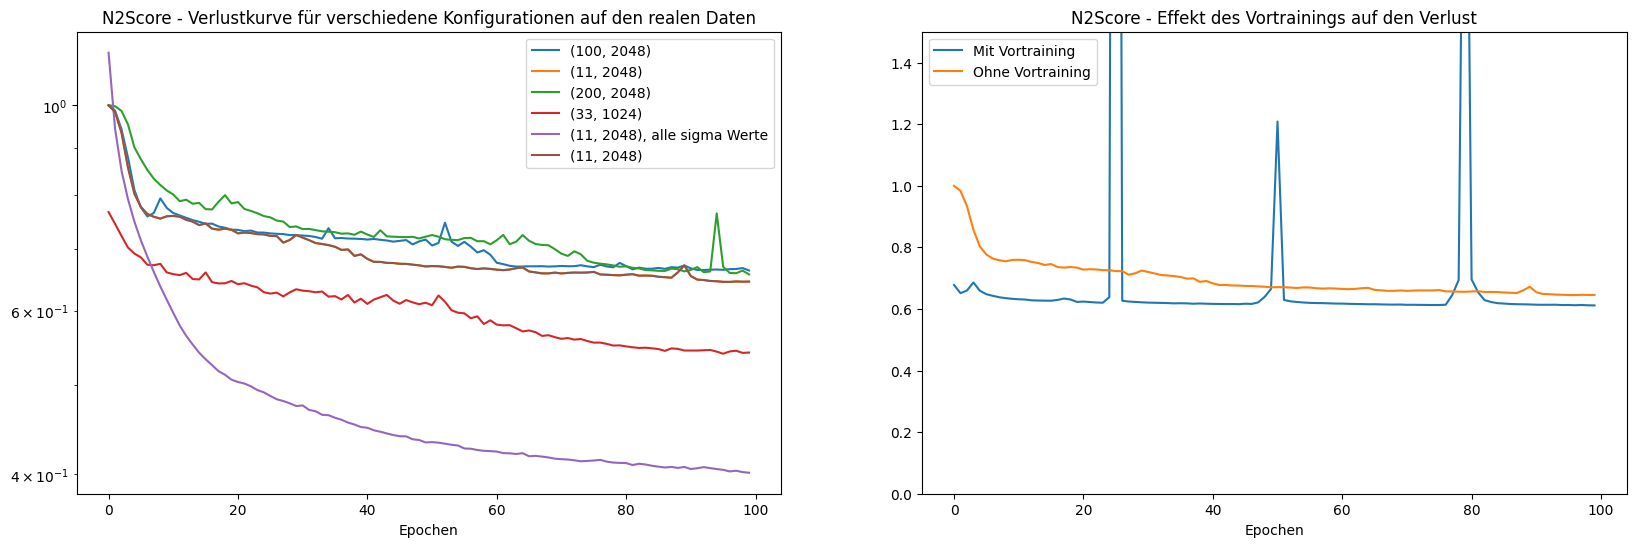

In [40]:
plt.figure(figsize=(10, 6))
"""
for i, (config, data) in  enumerate(loss_train_dict.items()):
    if 'part1_synthetisch_gaus_real' in config:
        print('skip')
        continue
    plt.plot(data["steps"], data["values"], linestyle='-', label=f"{config}")
    #print(min(data["values"]))
    print(config)
"""
x = np.arange(0, 100)
plt.plot(x, loss_train_dict['training_channel_100_no_norm_only_real']["values"], linestyle='-', label=f"(100, 2048)")
plt.plot(x, loss_train_dict['part1_only_real']["values"], linestyle='-', label=f"(11, 2048)")
plt.plot(x, loss_train_dict['200_only_real']["values"], linestyle='-', label=f"(200, 2048)")
plt.plot(x, loss_train_dict['33_model_architektur_syn_real']["values"], linestyle='-', label=f"(33, 1024)")
plt.plot(x, loss_train_dict['large_sigma_training_only_real']["values"], linestyle='-', label=f"(11, 2048), alle sigma Werte")
plt.plot(x, loss_train_dict['part1_only_real']["values"], linestyle='-', label=f"(11, 2048)")

plt.yscale('log')
plt.xlabel("Epochen")
plt.title("N2Score - Verlustkurve für verschiedene Konfigurationen auf den realen Daten")
plt.legend()
plt.show()
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 6))

# Plot the first graph on the left
ax1.plot(x, loss_train_dict['training_channel_100_no_norm_only_real']["values"], linestyle='-', label=f"(100, 2048)")
ax1.plot(x, loss_train_dict['part1_only_real']["values"], linestyle='-', label=f"(11, 2048)")
ax1.plot(x, loss_train_dict['200_only_real']["values"], linestyle='-', label=f"(200, 2048)")
ax1.plot(x, loss_train_dict['33_model_architektur_syn_real']["values"], linestyle='-', label=f"(33, 1024)")
ax1.plot(x, loss_train_dict['large_sigma_training_only_real']["values"], linestyle='-', label=f"(11, 2048), alle sigma Werte")
ax1.plot(x, loss_train_dict['part1_only_real']["values"], linestyle='-', label=f"(11, 2048)")
ax1.set_yscale('log')
ax1.set_xlabel("Epochen")
ax1.set_title("N2Score - Verlustkurve für verschiedene Konfigurationen auf den realen Daten")
ax1.legend()

# Plot the second graph on the right
ax2.plot(x, loss_train_dict['part1_synthetisch_gaus_real']["values"][300:], linestyle='-', label=f"Mit Vortraining")
ax2.plot(x, loss_train_dict['part1_only_real']["values"], linestyle='-', label=f"Ohne Vortraining")
ax2.set_ylim([0, 1.5])
ax2.set_xlabel("Epochen")
ax2.set_title("N2Score - Effekt des Vortrainings auf den Verlust")
ax2.legend()

plt.show()